In [18]:
# Import libraries
import pandas as pd
import numpy as np
from pyampute.ampute import MultivariateAmputation
from pyampute.exploration.md_patterns import mdPatterns

#import rpy2
#import rpy2.robjects as robjects
#from rpy2.robjects.conversion import localconverter
#from rpy2.robjects.packages import importr
#from rpy2.robjects import pandas2ri

In [2]:
# Load datasets
boston = pd.read_csv("../../data/toy-dataset/Boston.csv", index_col=0)
biopsy = pd.read_csv("../../data/toy-dataset/biopsy.csv", index_col=0)

In [6]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [38]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [39]:
boston.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [8]:
biopsy.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
1,1000025,5,1,1,1,2,1.0,3,1,1,benign
2,1002945,5,4,4,5,7,10.0,3,2,1,benign
3,1015425,3,1,1,1,2,2.0,3,1,1,benign
4,1016277,6,8,8,1,3,4.0,3,7,1,benign
5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [36]:
biopsy.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [37]:
biopsy.nunique()

ID       645
V1        10
V2        10
V3        10
V4        10
V5        10
V6        10
V7        10
V8        10
V9         9
class      2
dtype: int64

In [29]:
# Relevant references:
# https://rianneschouten.github.io/mice_ampute/vignette/ampute.html#Introduction_to_mice::ampute
# Note: Python version is now available as pyampute

# Create test data
# Note that amputer only takes numeric data so we will leave out ID and class
biopsytest = biopsy[["V1", "V2", "V3", "V4", "V5", "V7", "V8", "V9"]]

# Set random seed
SEED = 2023

# Initialise amputer
amputer = MultivariateAmputation(prop=0.2, seed=SEED)#, patterns=biopsy_amp_pattern)
biopsyamp0 = amputer.fit_transform(biopsytest)

2023-07-31 15:10:52,676 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


In [17]:
biopsyamp0.isna().sum()

V1    134
V2      0
V3    134
V4    134
V5      0
V7    134
V8      0
V9      0
dtype: int64

/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


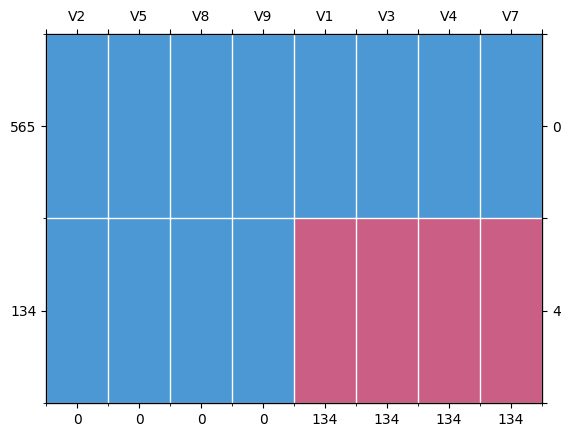

,row_count,V2,V5,V8,V9,V1,V3,V4,V7,n_missing_values
rows_no_missing,565,1,1,1,1,1,1,1,1,0
1,134,1,1,1,1,0,0,0,0,4
n_missing_values_per_col,,0,0,0,0,134,134,134,134,536


In [19]:
mdPatterns().get_patterns(biopsyamp0)

In [20]:
# Now try again with missing value in just one variable

# Set patterns for amputation
biopsy_amp_pattern = [
    {"incomplete_vars": ["V1"], "mechanism": "MAR"},
]

# Initialise amputer
amputer2 = MultivariateAmputation(prop=0.2, seed=SEED, patterns=biopsy_amp_pattern)
biopsyamp1 = amputer2.fit_transform(biopsytest)

2023-07-31 14:53:19,561 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


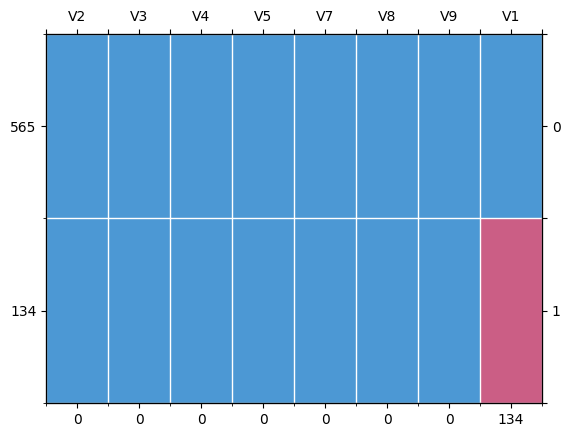

,row_count,V2,V3,V4,V5,V7,V8,V9,V1,n_missing_values
rows_no_missing,565,1,1,1,1,1,1,1,1,0
1,134,1,1,1,1,1,1,1,0,1
n_missing_values_per_col,,0,0,0,0,0,0,0,134,134


In [21]:
mdPatterns().get_patterns(biopsyamp1)

In [22]:
# Now try again with missing value in just two variables

# Set patterns for amputation
biopsy_amp_pattern3 = [
    {"incomplete_vars": ["V1", "V2"], "mechanism": "MAR"},
]

# Initialise amputer
amputer3 = MultivariateAmputation(prop=0.2, seed=SEED, patterns=biopsy_amp_pattern3)
biopsyamp2 = amputer3.fit_transform(biopsytest)

2023-07-31 15:03:20,959 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


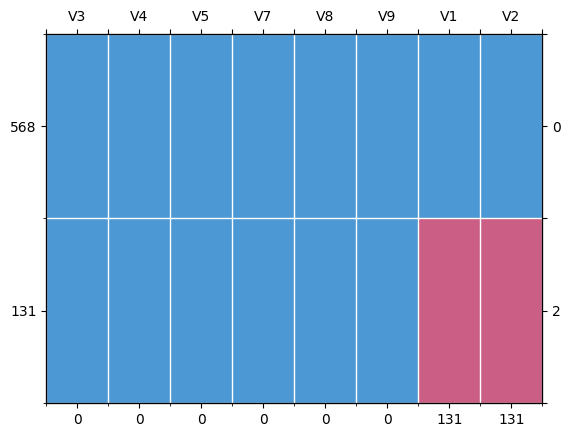

,row_count,V3,V4,V5,V7,V8,V9,V1,V2,n_missing_values
rows_no_missing,568,1,1,1,1,1,1,1,1,0
1,131,1,1,1,1,1,1,0,0,2
n_missing_values_per_col,,0,0,0,0,0,0,131,131,262


In [23]:
mdPatterns().get_patterns(biopsyamp2)

In [25]:
# Let's try with multiple missing patterns now

# Set patterns for amputation
biopsy_amp_pattern4 = [
    {"incomplete_vars": ["V1"], "mechanism": "MAR"},
    {"incomplete_vars": ["V1", "V2"], "mechanism": "MAR"},
]

# Initialise amputer
amputer4 = MultivariateAmputation(prop=0.2, seed=SEED, patterns=biopsy_amp_pattern4)
biopsyamp3 = amputer4.fit_transform(biopsytest)

2023-07-31 15:09:27,453 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning scripts/generate_shift_lookup_table.py to regenerate the lookup table.


/Users/christianliman/Documents/GitHub/mlds-uda-autumn2022/env/lib/python3.9/site-packages/pyampute/exploration/md_patterns.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_values = group_values.append(colsums, ignore_index=True)


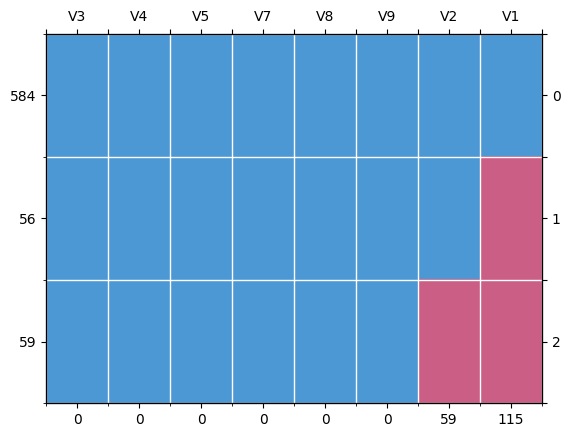

,row_count,V3,V4,V5,V7,V8,V9,V2,V1,n_missing_values
rows_no_missing,584,1,1,1,1,1,1,1,1,0
1,56,1,1,1,1,1,1,1,0,1
2,59,1,1,1,1,1,1,0,0,2
n_missing_values_per_col,,0,0,0,0,0,0,59,115,174


In [26]:
mdPatterns().get_patterns(biopsyamp3)

In [27]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [31]:
# Collate test data
biopsy_test_df = pd.concat([biopsyamp3, biopsy[["class"]]], axis=1)

In [32]:
biopsy_test_df.head()

,V1,V2,V3,V4,V5,V7,V8,V9,class
1,5.0,1.0,1,1,2,3,1,1,benign
2,5.0,4.0,4,5,7,3,2,1,benign
3,3.0,1.0,1,1,2,3,1,1,benign
4,NaN,8.0,8,1,3,3,7,1,benign
5,4.0,1.0,1,3,2,3,1,1,benign


In [33]:
biopsy.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
1,1000025,5,1,1,1,2,1.0,3,1,1,benign
2,1002945,5,4,4,5,7,10.0,3,2,1,benign
3,1015425,3,1,1,1,2,2.0,3,1,1,benign
4,1016277,6,8,8,1,3,4.0,3,7,1,benign
5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [40]:
biopsy["V1"].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: V1, dtype: int64

In [42]:
biopsy["V1"].median()

4.0

In [41]:
biopsy["V2"].value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: V2, dtype: int64

In [44]:
biopsy["V2"].median()

1.0

In [34]:
biopsy_test_df.shape

(699, 9)

In [35]:
# save test data
biopsy_test_df.to_csv("../../data/toy-dataset/biopsy_test_data.csv")